In [49]:
import numpy as np

def E(phi):
    return (phi[0][0][0]-0.7)**2 + (phi[0][0][1]-1.1)**2 + (phi[0][1][0]+0.3)**2 + (phi[0][1][1]+0.1)**2

bL = 1
T = 2
Q = 2
phi = [[[0,0],[0,0]]]

E(phi)

1.8000000000000003

In [50]:
def SPSA(k_max):
    #Initalization
    k = 0
    alpha = 0.602
    A = 10
    a = 0.2
    gamma = 0.101
    c = 0.2
    phi_k = np.array(phi)
    E_l = []
    
    #Being Iterations
    for k in range(k_max):
        #Update c and a
        a_k = a/((A + k + 1)**alpha)
        c_k = c/((k + 1)**gamma)

        #Find Delta
        Delta_k = np.array(phi_k)
        for b in range(bL):
            for t in range(T):
                for q in range(Q):
                    Delta_k[b][t][q] = 1 - 2*np.random.binomial(size=None, n=1, p= 0.5)
            
        #Find E    
        E_A = E(phi_k + c_k*Delta_k)
        E_B = E(phi_k - c_k*Delta_k)
        
        #Calculate gradiant
        g = (E_A-E_B)/(2*c_k) 
        g_k = g * Delta_k
        phi_k = phi_k - a_k * g_k
        
        #Calculate new E
        E_f = E(phi_k)
        
        #Print and save E
        print(phi_k,g)
        #print('k=',k,'c_k=',c_k,'a_k=',a_k,'g=',g,'E_A=',E_A,'E_B=',E_B,'E_f=',E_f)
        E_l.append(E_f)
        
    return E_l

In [51]:
El = SPSA(100)

[[[ 0.18887374  0.18887374]
  [-0.18887374  0.18887374]]] 3.9999999999999982
[[[ 0.33226176  0.33226176]
  [-0.04548573  0.04548573]]] 3.200000000000001
[[[ 0.2887899   0.37573362]
  [-0.08895759  0.08895759]]] -1.018057096768124
[[[ 0.26502471  0.39949881]
  [-0.0651924   0.0651924 ]]] 0.5819429032318764
[[[ 0.3594467   0.4939208 ]
  [-0.15961439  0.15961439]]] 2.4101833603038525
[[[ 0.4397772   0.5742513 ]
  [-0.07928389  0.07928389]]] -2.1317225337792145
[[[ 0.41747185  0.59655664]
  [-0.10158923  0.10158923]]] 0.6139162340734078
[[[ 0.40218502  0.61184348]
  [-0.11687607  0.11687607]]] 0.43547350782601263
[[[ 0.45789304  0.66755151]
  [-0.06116804  0.06116804]]] 1.6394472937591533
[[[ 0.47170809  0.65373646]
  [-0.07498309  0.047353  ]]] 0.41931692366358236
[[[ 0.49104369  0.67307206]
  [-0.05564749  0.0666886 ]]] -0.6043710847317663
[[[ 0.45190728  0.71220847]
  [-0.0947839   0.02755219]]] 1.2580254772372619
[[[ 0.4702688   0.73056999]
  [-0.07642238  0.04591371]]] -0.606231920446

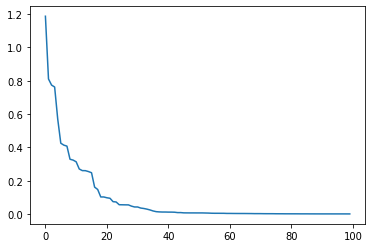

In [52]:
import matplotlib.pyplot as plt

tl = [i for i in range(len(El))]

plt.plot(tl,El)